In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Colab_Notebooks/BMET5933_Lab/hep2imgcnn.zip'

if os.path.exists(dataset_path):
    print("Dataset directory found!")
else:
    print("Dataset directory not found. Check your Google Drive path!")

Mounted at /content/drive
Dataset directory found!


STEP 1

In [ ]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/Colab_Notebooks/BMET5933_Lab/hep2imgcnn.zip'
destination_path = '/content/hep2cnn/'

if os.path.exists(zip_file_path):
    print("ZIP file found, starting extraction...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_path)
    print(f"Dataset extracted to: {destination_path}")
else:
    print("ZIP file not found. Check the file path!")

ZIP file found, starting extraction...
Dataset extracted to: /content/hep2cnn/


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

data_dir = "/content/hep2cnn/hep2imgcnn"
img_size = (299, 299)  # InceptionV3 input size

# Load dataset
batch_size = 32
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)


Found 453 files belonging to 5 classes.
Using 363 files for training.
Found 453 files belonging to 5 classes.
Using 90 files for validation.


STEP 2

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze base model

# Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_ds.class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


STEP 3

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,906,085 (91.19 MB)

 Trainable params: 2,103,301 (8.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

STEP 4

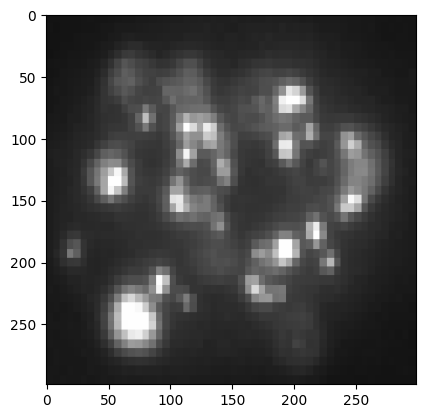

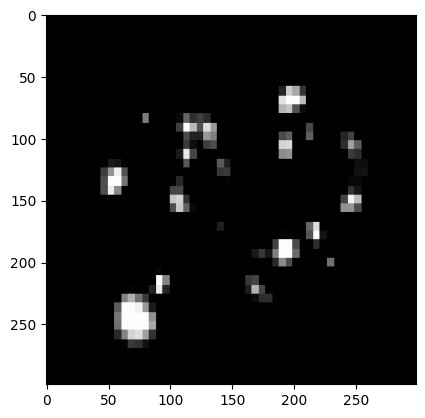

In [ ]:
img_path = '/content/hep2cnn/hep2imgcnn/centromere/784.png'
img = image.load_img(img_path, target_size=(299, 299))
im = image.img_to_array(img)
im = np.expand_dims(im, axis=0)
im = preprocess_input(im)  # Preprocess image as per InceptionV3 requirements

# Display original and preprocessed images
plt.imshow(img)
plt.show()

plt.imshow(im[0,:,:,:])
plt.show()

STEP 5

In [ ]:
# Predict class probabilities
preds = model.predict(im)

# Convert predictions into readable class labels
print('Predicted:', decode_predictions(preds, top=5)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Received array with shape: (1, 5)

Since the model was trained on ImageNet it did not give reasonable outputs for the cell data.

STEP 6

In [ ]:
# Remove the classification layers and extract features
inception_tl_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

STEP 7

In [ ]:
# Get a list of image paths using glob
image_paths = glob.glob('/content/hep2cnn/hep2imgcnn/**/*.png', recursive=True)

all_image_features = []
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(299, 299))
    im = image.img_to_array(img)
    im = np.expand_dims(im, axis=0)
    im = preprocess_input(im)

    image_features = inception_tl_model.predict(im)
    all_image_features.append(image_features)

# Convert extracted features into a NumPy feature matrix
features = np.concatenate(all_image_features, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━

STEP 8

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import os
labels = [os.path.basename(os.path.dirname(img_path)) for img_path in image_paths]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate the model
accuracy = svm_model.score(X_test, y_test)
print(f'SVM Accuracy: {accuracy * 100:.2f}%')

SVM Accuracy: 89.01%


STEP 9

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

# Modify the model architecture
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# Define the new model
fine_tuned_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze pre-trained model layers
for layer in base_model.layers:
    layer.trainable = False  # Prevent training on the original layers

# Compile the model
fine_tuned_model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
train_history = fine_tuned_model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.2720 - loss: 25.5517 - val_accuracy: 0.5222 - val_loss: 4.2589
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step - accuracy: 0.5609 - loss: 5.2269 - val_accuracy: 0.7222 - val_loss: 1.9774
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.6150 - loss: 2.4701 - val_accuracy: 0.6000 - val_loss: 1.8575
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.6240 - loss: 1.8778 - val_accuracy: 0.5778 - val_loss: 2.0381
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.7344 - loss: 1.0587 - val_accuracy: 0.7667 - val_loss: 1.0193
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.7818 - loss: 0.8380 - val_accuracy: 0.8111 - val_loss: 0.7600
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.8040 - loss: 0.6114 - val_accuracy: 0.8444 - val_loss: 0.7601
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.8223 - loss: 0.4589 - val_accuracy: 0.

In [ ]:
val_loss, val_acc = fine_tuned_model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7929 - loss: 0.7761
Validation Accuracy: 78.89%


Result after freezing some layers

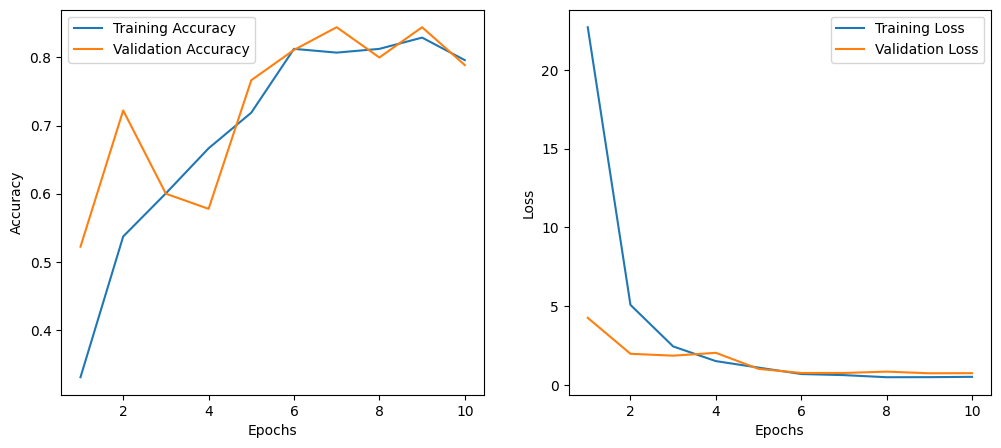

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Unfreeze some deeper layers
for layer in base_model.layers[-20:]:  # Fine-tune last 20 layers
    layer.trainable = True  # Allow training on selected layers

fine_tuned_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
train_history = fine_tuned_model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.2093 - loss: 1.8197 - val_accuracy: 0.5778 - val_loss: 0.9634
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.3033 - loss: 1.5134 - val_accuracy: 0.6333 - val_loss: 0.9495
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.3069 - loss: 1.4262 - val_accuracy: 0.6444 - val_loss: 0.9323
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.4613 - loss: 1.2401 - val_accuracy: 0.6889 - val_loss: 0.9103
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.5165 - loss: 1.1470 - val_accuracy: 0.7222 - val_loss: 0.8827
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.5176 - loss: 1.1046 - val_accuracy: 0.7222 - val_loss: 0.8658
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.5792 - loss: 1.0024 - val_accuracy: 0.7444 - val_loss: 0.8546
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.6590 - loss: 0.9318 - val_accuracy: 0.7

Result after unfreezing layers and fine tuning

In [ ]:
val_loss, val_acc = fine_tuned_model.evaluate(val_ds)
print(f"Validation Accuracy After Fine-Tuning: {val_acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7244 - loss: 0.8282
Validation Accuracy After Fine-Tuning: 72.22%


Challenge 1: Using data augmentation to fine tune a CNN

In [ ]:
dataset_dir = "/content/hep2cnn/hep2imgcnn/"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create Data Augmentation Generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2,
    preprocessing_function=preprocess_input
)

# Load Training Dataset with Augmentation
train_ds1 = datagen.flow_from_directory(
    dataset_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode="sparse",
    subset="training"
)

# Load Validation Dataset
val_datagen1 = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_input
)

val_ds1 = val_datagen1.flow_from_directory(
    dataset_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode="sparse",
    subset="validation"
)

Found 364 images belonging to 5 classes.
Found 89 images belonging to 5 classes.


In [ ]:
# Load Pre-Trained InceptionV3 Model Without Classification Layers
base_model = InceptionV3(weights="imagenet", include_top=False)

# Add Custom Layers for Fine-Tuning
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation="relu")(x)
predictions = Dense(train_ds1.num_classes, activation="softmax")(x)

# Define the Fine-Tuned Model
fine_tuned_model1 = Model(inputs=base_model.input, outputs=predictions)

# Freeze Early Layers to Preserve Pre-Trained Knowledge
for layer in base_model.layers[:-20]:
    layer.trainable = False

from tensorflow.keras.optimizers import Adam

fine_tuned_model1.compile(
    optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Add Early Stopping Callback to Prevent Overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train the Fine-Tuned Model
train_history = fine_tuned_model1.fit(
    train_ds1,  # Augmented training dataset
    epochs=10,
    validation_data=val_ds1,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.2740 - loss: 1.6080 - val_accuracy: 0.1910 - val_loss: 1.5727
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 687ms/step - accuracy: 0.4071 - loss: 1.4524 - val_accuracy: 0.3258 - val_loss: 1.5033
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 649ms/step - accuracy: 0.4933 - loss: 1.3405 - val_accuracy: 0.3708 - val_loss: 1.4386
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 824ms/step - accuracy: 0.6336 - loss: 1.2225 - val_accuracy: 0.4045 - val_loss: 1.3857
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 823ms/step - accuracy: 0.6519 - loss: 1.1596 - val_accuracy: 0.4382 - val_loss: 1.3226
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 644ms/step - accuracy: 0.6991 - loss: 1.0779 - val_accuracy: 0.4831 - val_loss: 1.2722
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 764ms/step - accuracy: 0.6777 - loss: 1.0346 - val_accuracy: 0.5169 - val_loss: 1.2251
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 900ms/step - accuracy: 0.6868 - loss: 0.9787 - val_accuracy: 0

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5521 - loss: 1.1288
Validation Accuracy After Fine-Tuning: 57.30%


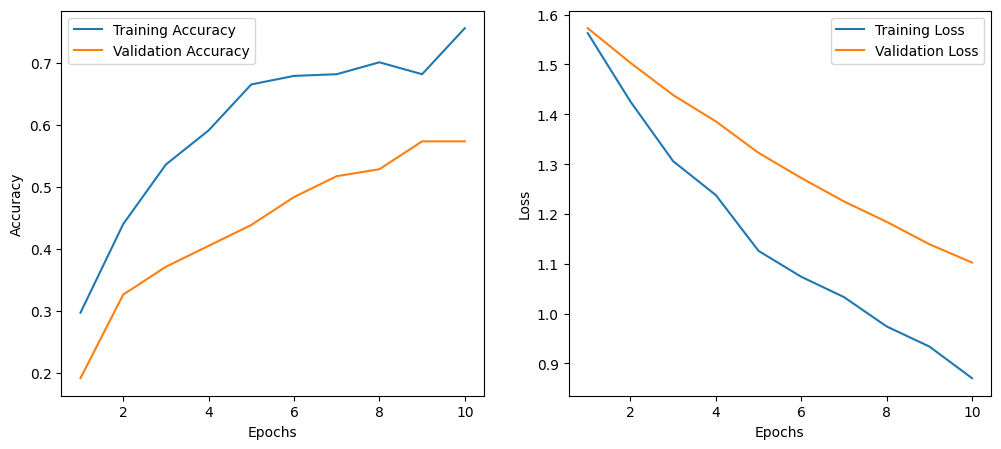

In [ ]:
# Evaluate Fine-Tuned Model on Validation Data
val_loss, val_acc = fine_tuned_model1.evaluate(val_ds1)
print(f"Validation Accuracy After Fine-Tuning: {val_acc * 100:.2f}%")

# Plot Training & Validation Accuracy and Loss
acc = train_history.history["accuracy"]
val_acc = train_history.history["val_accuracy"]
loss = train_history.history["loss"]
val_loss = train_history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()